<h1 style="text-align:center">NLP Lab 3</h1>

# Performed by : **Idriss Khattabi**
# Supervised by: **AACHAK Lotfi**

---------------
### **Objective** : The main purpose behind this lab is to get familiar with NLP language models using Sklearn library.

## Part 1: Language Modeling / Regression :

The purpose of "**Part 1**" is to validate approaches to grading short answer tests using machine learning models. The problem is to score and evaluate the student answer based on a model that performs regression.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

# Download NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

### load data : 

In [2]:
data = pd.read_csv("answers.csv")
data.head()

,id,answer,score,correct
0,1.1,High risk problems are address in the prototyp...,3.5,0.0
1,1.1,To simulate portions of the desired final prod...,5.0,1.0
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0
4,1.1,It is used to let the users have a first idea ...,3.0,0.0


In [3]:
len(data)

2442

In [4]:
data.isna().any()

id         False
answer     False
score      False
correct    False
dtype: bool

In [5]:
# Remove duplicate rows
data = data.drop_duplicates(subset='answer')

In [6]:
len(data)

2312

### 1. Establish a preprocessing NLP pipeline (Tokenization stemming lemmatization, Stop words, Discretization, etc) of the collected Dataset.

In [7]:
def clean_text(text):
    # Remove non-alphanumeric characters
    cleaned_text = ''.join(char.lower() for char in text if char.isalnum() or char == ' ')
    # Remove extra spaces
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

# insialization :
Lemmatized_words = []
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

for text, i in zip(data["answer"], range(len(data))) :

    # Clean text
    cleaned_text = clean_text(text)
    
    # Tokenization
    tokens = word_tokenize(cleaned_text)
    
    # Removing punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Removing stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Stemming
    stemmed_tokens = [porter.stem(token) for token in tokens]
    
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    if i == 0 or i == 10 or i == 20: 
        print("-> Text : ", text)
        print("-> Stemming :", stemmed_tokens)
        print("-> Lemmatization :", lemmatized_tokens)
        print("*"*50)

    # save Lemmatized words :
    Lemmatized_words.append(lemmatized_tokens)

-> Text :  High risk problems are address in the prototype program to make sure that the program is feasible. A prototype may also be used to show a company that the software can be possibly programmed.
-> Stemming : ['high', 'risk', 'problem', 'address', 'prototyp', 'program', 'make', 'sure', 'program', 'feasibl', 'prototyp', 'may', 'also', 'use', 'show', 'compani', 'softwar', 'possibl', 'program']
-> Lemmatization : ['high', 'risk', 'problem', 'address', 'prototype', 'program', 'make', 'sure', 'program', 'feasible', 'prototype', 'may', 'also', 'used', 'show', 'company', 'software', 'possibly', 'programmed']
**************************************************
-> Text :  A program that stimulates the behavior of portions of the desired software product.
-> Stemming : ['program', 'stimul', 'behavior', 'portion', 'desir', 'softwar', 'product']
-> Lemmatization : ['program', 'stimulates', 'behavior', 'portion', 'desired', 'software', 'product']
*********************************************

In [8]:
# save Lemmatized words in the data DataFrame :
data["lemmatiwed_word"] = Lemmatized_words
data.head()

,id,answer,score,correct,lemmatiwed_word
0,1.1,High risk problems are address in the prototyp...,3.5,0.0,"[high, risk, problem, address, prototype, prog..."
1,1.1,To simulate portions of the desired final prod...,5.0,1.0,"[simulate, portion, desired, final, product, q..."
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0,"[prototype, program, simulates, behavior, port..."
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0,"[defined, specification, phase, prototype, sti..."
4,1.1,It is used to let the users have a first idea ...,3.0,0.0,"[used, let, user, first, idea, completed, prog..."


### 2. Encode your Data vectors By using Word2vec (CBOW, Skip Gram), Bag Of words, TF-IDF.

#### i - Using Word2Vec: Continuous Bag of Words (CBOW) and Skip-gram

In [9]:
# Word2Vec model using CBOW
cbow_model = Word2Vec(Lemmatized_words, vector_size=100, window=5, min_count=1, sg=0)

# Word2Vec model using Skip-gram
skipgram_model = Word2Vec(Lemmatized_words, vector_size=100, window=5, min_count=1, sg=1)

**=> Examples of usage of Word2Vec models :**

In [10]:
# Example 1 :
word = "software"
cbow_vector = cbow_model.wv.most_similar(word)
skipgram_vector = skipgram_model.wv.most_similar(word)

print("=> CBOW most_similar for '{}':".format(word), cbow_vector)
print("-"*100)
print("=> Skip-gram most_similar for '{}':".format(word), skipgram_vector)

=> CBOW most_similar for 'software': [('program', 0.999291181564331), ('make', 0.999180257320404), ('would', 0.999160647392273), ('compiler', 0.9991544485092163), ('problem', 0.9991538524627686), ('time', 0.9991527795791626), ('position', 0.9991399049758911), ('int', 0.9991390109062195), ('sorted', 0.9991139769554138), ('using', 0.9991046786308289)]
----------------------------------------------------------------------------------------------------
=> Skip-gram most_similar for 'software': [('behavior', 0.997604250907898), ('depending', 0.9975287318229675), ('desired', 0.997443675994873), ('product', 0.997402012348175), ('us', 0.9973108768463135), ('say', 0.9972730875015259), ('fails', 0.9972231984138489), ('often', 0.9971567988395691), ('difficult', 0.9971345663070679), ('become', 0.9970462918281555)]


In [13]:
# Example 2 :
word = "problem"
cbow_vector = cbow_model.wv.most_similar(word)
skipgram_vector = skipgram_model.wv.most_similar(word)

print("=> CBOW most_similar for '{}':".format(word), cbow_vector)
print("-"*100)
print("=> Skip-gram most_similar for '{}':".format(word), skipgram_vector)

=> CBOW most_similar for 'problem': [('program', 0.9997347593307495), ('easier', 0.9996424913406372), ('time', 0.9996383190155029), ('also', 0.9996320009231567), ('would', 0.9996317625045776), ('make', 0.9996289014816284), ('operation', 0.9996165037155151), ('array', 0.9996128082275391), ('code', 0.9996027946472168), ('one', 0.9996022582054138)]
----------------------------------------------------------------------------------------------------
=> Skip-gram most_similar for 'problem': [('recursion', 0.9730550646781921), ('solve', 0.9666934609413147), ('recursive', 0.9663887619972229), ('smaller', 0.9650657773017883), ('infinite', 0.9541262984275818), ('converge', 0.953586220741272), ('step', 0.9531311392784119), ('incorrectly', 0.95050448179245), ('divide', 0.9499750733375549), ('case', 0.9469220042228699)]


In [12]:
# Example 3 :
word = "prototype"
cbow_vector = cbow_model.wv.most_similar(word)
skipgram_vector = skipgram_model.wv.most_similar(word)

print("=> CBOW most_similar for '{}':".format(word), cbow_vector)
print("-"*100)
print("=> Skip-gram most_similar for '{}':".format(word), skipgram_vector)

=> CBOW most_similar for 'prototype': [('compiler', 0.9995225071907043), ('function', 0.9994953870773315), ('class', 0.9993992447853088), ('code', 0.9993623495101929), ('also', 0.999359667301178), ('used', 0.9993544220924377), ('program', 0.9993436932563782), ('object', 0.9993382096290588), ('value', 0.9993125796318054), ('definition', 0.9993122816085815)]
----------------------------------------------------------------------------------------------------
=> Skip-gram most_similar for 'prototype': [('includes', 0.9959132671356201), ('definition', 0.993552029132843), ('used', 0.9926382899284363), ('signature', 0.9926190972328186), ('constructor', 0.9894689917564392), ('outside', 0.9892576932907104), ('private', 0.9889452457427979), ('parameter', 0.988390326499939), ('class', 0.985640823841095), ('public', 0.984488308429718)]


#### ii - Using Bag of Words (BoW):

In [14]:

Lemmatized_texts = [" ".join(words) for words in Lemmatized_words]

# Create Bag of Words representation
vectorizer1 = CountVectorizer()
bow_representation = vectorizer1.fit_transform(Lemmatized_texts).toarray()

print("-"*50)
print("Bag of Words representation:")
print(bow_representation)

# Get feature names (vocabulary)
feature_names = vectorizer1.get_feature_names_out()

print("size of feature_names :", len(feature_names))
print("feature_names :", feature_names)

--------------------------------------------------
Bag of Words representation:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
size of feature_names : 2374
feature_names : ['000000' '012' '0the' ... 'youre' 'zero' 'zillion']


In [15]:
feature_count_dict = dict(zip(feature_names, bow_representation.sum(axis=0)))
print("Feature names from the fisrt row and their counts:")
for token in Lemmatized_words[0] :
    print(f"{token}: {feature_count_dict[token]}", end=" || ")

Feature names from the fisrt row and their counts:
high: 1 || risk: 1 || problem: 113 || address: 122 || prototype: 56 || program: 173 || make: 51 || sure: 6 || program: 173 || feasible: 1 || prototype: 56 || may: 36 || also: 68 || used: 104 || show: 12 || company: 1 || software: 15 || possibly: 5 || programmed: 2 || 

#### iii - Using TF-IDF :

In [16]:

Lemmatized_texts = [" ".join(text) for text in Lemmatized_words]

# Create TF-IDF representation
vectorizer2 = TfidfVectorizer()
tfidf_representation = vectorizer2.fit_transform(Lemmatized_texts).toarray()

print("TF-IDF representation:")
print(tfidf_representation)

# Get feature names (vocabulary)
feature_names2 = vectorizer2.get_feature_names_out()

print("size of feature_names :", len(feature_names2))
print("feature_names :", feature_names2)

TF-IDF representation:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
size of feature_names : 2374
feature_names : ['000000' '012' '0the' ... 'youre' 'zero' 'zillion']


In [17]:
feature_count_dict2 = dict(zip(feature_names2, tfidf_representation.sum(axis=0)))
print("Feature names from the fisrt row and their counts:")
for token in Lemmatized_words[0] :
    print(f"{token}: {feature_count_dict2[token]:.2f}", end=" || ")

Feature names from the fisrt row and their counts:
high: 0.29 || risk: 0.29 || problem: 21.98 || address: 39.49 || prototype: 14.27 || program: 35.14 || make: 10.86 || sure: 1.59 || program: 35.14 || feasible: 0.29 || prototype: 14.27 || may: 8.18 || also: 13.25 || used: 23.48 || show: 3.09 || company: 0.29 || software: 4.12 || possibly: 1.38 || programmed: 0.62 || 

### 3. Train your models by using SVR, Naive Bayes, Linear Regression , Decision Tree Algorithms (The embedding will be done by Word2Vec).

Calculating Sentence Embeddings : 

We need to convert each sentence into a fixed-size vector. This is done by averaging the word embeddings for all valid words in the sentence.

This function filters out words not present in the model's vocabulary, computes the mean vector of the valid words, and returns a zero vector if no valid words are found.

In [18]:
# Function to compute embeddings for each sentence
def compute_embeddings(sentence, model):
    # Filter out words not present in the Word2Vec vocabulary
    valid_words = [word for word in sentence if word in model.wv]
    if valid_words:
        # Compute the average embedding for the model
        sentence_embedding = np.mean([model.wv[word] for word in valid_words], axis=0)
    else:
        # If no valid words found, return NaN
        sentence_embedding = np.nan
    return sentence_embedding

# Compute embeddings for CBOW model and store them in a new column
data['cbow_embeddings'] = data['lemmatiwed_word'].apply(lambda sentence: compute_embeddings(sentence, cbow_model))

# Compute embeddings for Skip-gram model and store them in a new column
data['skipgram_embeddings'] = data['lemmatiwed_word'].apply(lambda sentence: compute_embeddings(sentence, skipgram_model))


In [19]:
# Remove duplicate rows
data = data.drop_duplicates(subset='cbow_embeddings')

In [20]:
# Drop NA
data = data.dropna(subset='cbow_embeddings')

In [21]:
data.head()

,id,answer,score,correct,lemmatiwed_word,cbow_embeddings,skipgram_embeddings
0,1.1,High risk problems are address in the prototyp...,3.5,0.0,"[high, risk, problem, address, prototype, prog...","[-0.056885693, 0.16198005, 0.075529434, 0.0060...","[0.013975439, 0.12841742, 0.05337805, -0.06676..."
1,1.1,To simulate portions of the desired final prod...,5.0,1.0,"[simulate, portion, desired, final, product, q...","[-0.04288703, 0.122310966, 0.055705238, 0.0021...","[0.020961717, 0.12775242, 0.04435967, -0.08168..."
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0,"[prototype, program, simulates, behavior, port...","[-0.04262539, 0.13092329, 0.06179861, 0.005782...","[0.024526263, 0.13238364, 0.05544702, -0.07207..."
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0,"[defined, specification, phase, prototype, sti...","[-0.04025829, 0.1195125, 0.05741969, 0.0036804...","[0.02091289, 0.120895565, 0.05241481, -0.07396..."
4,1.1,It is used to let the users have a first idea ...,3.0,0.0,"[used, let, user, first, idea, completed, prog...","[-0.037741404, 0.10548091, 0.050867602, 0.0032...","[0.0034835169, 0.12018603, 0.050448537, -0.063..."


In [22]:
print("Length of X_cbow_embeddings:", len(data["cbow_embeddings"]))
print("Length of score:", len(data["score"]))

Length of X_cbow_embeddings: 2308
Length of score: 2308


In [23]:
data["cbow_embeddings"].head()

0    [-0.056885693, 0.16198005, 0.075529434, 0.0060...
1    [-0.04288703, 0.122310966, 0.055705238, 0.0021...
2    [-0.04262539, 0.13092329, 0.06179861, 0.005782...
3    [-0.04025829, 0.1195125, 0.05741969, 0.0036804...
4    [-0.037741404, 0.10548091, 0.050867602, 0.0032...
Name: cbow_embeddings, dtype: object

In [24]:
X_embeddings = np.vstack(data['cbow_embeddings'].values)
y = data["score"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)

In [25]:
# Verify shapes
print("X_embeddings shape:", X_embeddings.shape)
print("y shape:", y.shape)

X_embeddings shape: (2308, 100)
y shape: (2308,)


In [26]:
### Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

# nb_model = GaussianNB()
# nb_model.fit(X_train, y_train)
# nb_predictions = nb_model.predict(X_test)

### Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

### Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

### 4. Evaluate the four languages models by using standards metrics (MSE , RMSE, etc), choose the best model then argument your choice.

In [27]:
print("SVR Mean Squared Error:", mean_squared_error(y_test, svr_predictions))
print("SVR - R Squared (R2):", r2_score(y_test, svr_predictions))
print("*"*75)

# print("Naive Bayes Mean Squared Error:", mean_squared_error(y_test, nb_predictions))
# print("NB - R Squared (R2):", r2_score(y_test, nb_predictions))
# print("*"*75)

print("Linear Regression Mean Squared Error:", mean_squared_error(y_test, lr_predictions))
print("LR - R Squared (R2):", r2_score(y_test, lr_predictions))
print("*"*75)

print("Decision Tree Mean Squared Error:", mean_squared_error(y_test, dt_predictions))
print("CART - R Squared (R2):", r2_score(y_test, dt_predictions))

SVR Mean Squared Error: 1.5731874112105553
SVR - R Squared (R2): -0.2333834607231826
***************************************************************************
Linear Regression Mean Squared Error: 1.228673578179358
LR - R Squared (R2): 0.036716376475524504
***************************************************************************
Decision Tree Mean Squared Error: 1.8068275763588264
CART - R Squared (R2): -0.4165580230169197


### 5. Interpret the Obtained Results.

- **SVM** has a high error and negative R2, indicating poor performance.
- **Linear Regression** performs better than SVR with lower MSE and positive R2, but still explains only 3.6% of the variance.
- **Decision Tree** has the highest error and worst R2, performing poorly.

### Overall Interpretation

- **Best Model:** Linear Regression has the lowest MSE and the highest (albeit low) R2 value, making it the best among the three models evaluated.
- **Performance Issues:** All models show poor performance, indicating potential issues with data quality, feature engineering, or model selection.

------------------------

# Part 2 :  Language Modeling / Classification

The purpose of "**Part 2**" is to classify tweets/texts using machine learning models. there is 4 classes : Positive, Negative, Irrelevent, Neutral.

### Load Data :

In [2]:
data2 = pd.read_csv("twitter_training.csv")
data2.columns=["num", "company", "target", "tweet"]
data2.head()

,num,company,target,tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
# remove Irrelevent Column
data2 = data2.drop(columns=["num", "company"])
data2.head()

,target,tweet
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [34]:
data2.isna().any()

target    False
tweet      True
dtype: bool

In [4]:
len(data2)

74681

In [4]:
data2 = data2.dropna(subset='tweet')

In [5]:
data2 = data2.drop_duplicates(subset='tweet')
len(data2)

69490

### 1. Establish a preprocessing NLP pipeline (Tokenization stemming lemmatization, Stop words, Discretization, etc) of the collected Dataset.


In [6]:
def clean_text2(text):
    # Remove links containing .com
    text = re.sub(r'\b\S*\.com\S*\b', '', text, flags=re.MULTILINE)
    # Remove links starts with http/https/www
    text = re.sub(r'http\S+\.com\S*|www\S+\.com\S*|https\S+\.com\S*', '', text, flags=re.MULTILINE)
    # Remove words starting with # or @
    text = re.sub(r'(@|#)\w+', '', text)
    # Remove non-alphanumeric characters (except spaces)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Convert to lowercase and remove extra spaces
    cleaned_text = ' '.join(text.lower().split())
    return cleaned_text

# insialization :
Lemmatized_words2 = []
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

for text, i in zip(data2["tweet"], range(len(data2))) :

    # Clean text
    cleaned_text = clean_text2(text)
    
    # Tokenization
    tokens = word_tokenize(cleaned_text)
    
    # Removing punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # all common punctuation characters (e.g., !"#$%&'()*+,-./:;<=>?@[\]^_{|}~`)
    # Removing stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Stemming
    stemmed_tokens = [porter.stem(token) for token in tokens]
    
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    if i == 0 or i == 10 or i == 20: 
        print("-> Text : ", text)
        print("-> Stemming :", stemmed_tokens)
        print("-> Lemmatization :", lemmatized_tokens)
        print("*"*50)

    # save Lemmatized words :
    Lemmatized_words2.append(lemmatized_tokens)

-> Text :  I am coming to the borders and I will kill you all,
-> Stemming : ['come', 'border', 'kill']
-> Lemmatization : ['coming', 'border', 'kill']
**************************************************
-> Text :  was
-> Stemming : []
-> Lemmatization : []
**************************************************
-> Text :  that I was the first real borderlands session in a nice long wait time where i actually had a really satisfying combat experience. and i got some really good kills
-> Stemming : ['first', 'real', 'borderland', 'session', 'nice', 'long', 'wait', 'time', 'actual', 'realli', 'satisfi', 'combat', 'experi', 'got', 'realli', 'good', 'kill']
-> Lemmatization : ['first', 'real', 'borderland', 'session', 'nice', 'long', 'wait', 'time', 'actually', 'really', 'satisfying', 'combat', 'experience', 'got', 'really', 'good', 'kill']
**************************************************


In [7]:
data2["Lemmatized_words"] = Lemmatized_words2
len(data2["Lemmatized_words"])

69490

In [63]:
data2.head(15)

,target,tweet,Lemmatized_words
0,Positive,I am coming to the borders and I will kill you...,"[coming, border, kill]"
1,Positive,im getting on borderlands and i will kill you ...,"[im, getting, borderland, kill]"
2,Positive,im coming on borderlands and i will murder you...,"[im, coming, borderland, murder]"
3,Positive,im getting on borderlands 2 and i will murder ...,"[im, getting, borderland, 2, murder]"
4,Positive,im getting into borderlands and i can murder y...,"[im, getting, borderland, murder]"
5,Positive,So I spent a few hours making something for fu...,"[spent, hour, making, something, fun, dont, kn..."
6,Positive,So I spent a couple of hours doing something f...,"[spent, couple, hour, something, fun, dont, kn..."
7,Positive,So I spent a few hours doing something for fun...,"[spent, hour, something, fun, dont, know, im, ..."
8,Positive,So I spent a few hours making something for fu...,"[spent, hour, making, something, fun, dont, kn..."
9,Positive,2010 So I spent a few hours making something f...,"[2010, spent, hour, making, something, fun, do..."


In [8]:
# remove NAN data :
data2 = data2.dropna(subset='Lemmatized_words')

In [9]:
# remove rows where the Lemmatized_words column contains an empty list :
data2 = data2[data2['Lemmatized_words'].apply(lambda x: len(x) > 0)]

In [10]:
# remobe duplicated data :
data2 = data2.drop_duplicates(subset='Lemmatized_words')
len(data2["Lemmatized_words"])

62539

### 2. Encode your Data vectors By using Word2vec (CBOW, Skip Gram), Bag Of words, TF-IDF.

#### i - Using Word2Vec: Continuous Bag of Words (CBOW) and Skip-gram

In [11]:
# Word2Vec model using CBOW
cbow_model2 = Word2Vec(Lemmatized_words2, vector_size=100, window=5, min_count=1, sg=0)

# Word2Vec model using Skip-gram
skipgram_model2 = Word2Vec(Lemmatized_words2, vector_size=100, window=5, min_count=1, sg=1)

**=> Examples of usage of Word2Vec models :**

In [13]:
# Example 1 :
word = "love"
cbow_vector = cbow_model2.wv.most_similar(word)
skipgram_vector = skipgram_model2.wv.most_similar(word)

print("=> CBOW most_similar for '{}':".format(word), cbow_vector)
print("-"*100)
print("=> Skip-gram most_similar for '{}':".format(word), skipgram_vector)

=> CBOW most_similar for 'love': [('enjoy', 0.776830792427063), ('assaulted', 0.7761009335517883), ('whipping', 0.7736964821815491), ('gilnean', 0.7725096940994263), ('shoo', 0.7629252672195435), ('fun', 0.7617813944816589), ('unblockkkk', 0.759751558303833), ('randomness', 0.757392942905426), ('spur', 0.756118893623352), ('trope', 0.7509856224060059)]
----------------------------------------------------------------------------------------------------
=> Skip-gram most_similar for 'love': [('rhys', 0.5823521018028259), ('lullaby', 0.5743995308876038), ('realism', 0.5585336089134216), ('drum', 0.5573713779449463), ('guff', 0.5560545325279236), ('rik', 0.5555176734924316), ('shotty', 0.5537235140800476), ('quirky', 0.5528828501701355), ('chess', 0.5501793622970581), ('greatly', 0.5501487851142883)]


In [14]:
# Example 2 :
word = "powerful"
cbow_vector = cbow_model2.wv.most_similar(word)
skipgram_vector = skipgram_model2.wv.most_similar(word)

print("=> CBOW most_similar for '{}':".format(word), cbow_vector)
print("-"*100)
print("=> Skip-gram most_similar for '{}':".format(word), skipgram_vector)

=> CBOW most_similar for 'powerful': [('95', 0.9659325480461121), ('original', 0.9517843723297119), ('badass', 0.9454988241195679), ('coolest', 0.9446460604667664), ('psp', 0.942152202129364), ('owning', 0.9418280720710754), ('compared', 0.9401451945304871), ('clever', 0.9390465021133423), ('studio', 0.9388402700424194), ('2018', 0.9387283325195312)]
----------------------------------------------------------------------------------------------------
=> Skip-gram most_similar for 'powerful': [('rescue', 0.7603567242622375), ('videogame', 0.7415180206298828), ('narcos', 0.7193096280097961), ('socool', 0.7167769074440002), ('distracting', 0.7164849638938904), ('quietest', 0.7113524079322815), ('platformer', 0.7108447551727295), ('admiration', 0.7091472148895264), ('beauty', 0.7088207006454468), ('remarkable', 0.7082667350769043)]


In [15]:
# Example 3 :
word = "life"
cbow_vector = cbow_model2.wv.most_similar(word)
skipgram_vector = skipgram_model2.wv.most_similar(word)

print("=> CBOW most_similar for '{}':".format(word), cbow_vector)
print("-"*100)
print("=> Skip-gram most_similar for '{}':".format(word), skipgram_vector)

=> CBOW most_similar for 'life': [('findom', 0.8868793249130249), ('real', 0.8840107917785645), ('looool', 0.8797255158424377), ('businessestablishment', 0.8764601945877075), ('matter', 0.8754610419273376), ('keem', 0.8618552684783936), ('dond', 0.8483588695526123), ('thought', 0.8461362719535828), ('depended', 0.8350448608398438), ('druggie', 0.8327618837356567)]
----------------------------------------------------------------------------------------------------
=> Skip-gram most_similar for 'life': [('matter', 0.6190528273582458), ('basketball', 0.6182340383529663), ('looool', 0.6137689352035522), ('avatar', 0.6125320196151733), ('keem', 0.603365421295166), ('painfully', 0.6030942797660828), ('traumatic', 0.6011253595352173), ('influence', 0.5939650535583496), ('comparing', 0.5927890539169312), ('findom', 0.5917501449584961)]


In [16]:
# Example 4 :
word = "fuck"
cbow_vector = cbow_model2.wv.most_similar(word)
skipgram_vector = skipgram_model2.wv.most_similar(word)

print("=> CBOW most_similar for '{}':".format(word), cbow_vector)
print("-"*100)
print("=> Skip-gram most_similar for '{}':".format(word), skipgram_vector)

=> CBOW most_similar for 'fuck': [('sake', 0.8661458492279053), ('as', 0.843934953212738), ('bro', 0.8367190957069397), ('hell', 0.8361731171607971), ('yeah', 0.8277100920677185), ('nigga', 0.8178245425224304), ('suck', 0.8167433142662048), ('forreal', 0.8131272196769714), ('bitch', 0.8108741044998169), ('idiot', 0.806605339050293)]
----------------------------------------------------------------------------------------------------
=> Skip-gram most_similar for 'fuck': [('messed', 0.5798510313034058), ('sake', 0.5656076669692993), ('subversion', 0.5652914047241211), ('abt', 0.5648744106292725), ('gunna', 0.5577450394630432), ('nvm', 0.5557709336280823), ('bro', 0.5537886619567871), ('cross', 0.5532991886138916), ('lmaooo', 0.5526207089424133), ('swear', 0.5517531633377075)]


#### ii - Using Bag of Words (BoW):

In [74]:

Lemmatized_texts2 = [" ".join(words) for words in Lemmatized_words2]

# Create Bag of Words representation
vectorizer3 = CountVectorizer()
bow_representation3 = vectorizer3.fit_transform(Lemmatized_texts2).toarray()

print("-"*50)
print("Bag of Words representation:")
print(bow_representation3)

# Get feature names (vocabulary)
feature_names3 = vectorizer3.get_feature_names_out()

print("size of feature_names :", len(feature_names3))
print("feature_names :", feature_names3)

--------------------------------------------------
Bag of Words representation:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
size of feature_names : 34398
feature_names : ['00' '000' '00011' ... 'zzgi8xvk7t' 'zzvfsrhewg' 'zzz']


In [75]:
feature_count_dict3 = dict(zip(feature_names3, bow_representation3.sum(axis=0)))
print("Feature names from the row 10 and their counts:")
for token in Lemmatized_words2[9] :
    print(f"{token}: {feature_count_dict3[token]}", end=" || ")

Feature names from the row 10 and their counts:
2010: 67 || spent: 187 || hour: 833 || making: 627 || something: 932 || fun: 1537 || dont: 2623 || know: 1860 || huge: 409 || rhandlerr: 2004 || fan: 618 || maya: 28 || one: 3660 || favorite: 627 || character: 556 || decided: 219 || make: 2246 || wallpaper: 14 || pc: 786 || original: 231 || image: 107 || versus: 18 || creation: 7 || made: 1033 || enjoy: 453 || 

In [12]:

Lemmatized_texts2 = [" ".join(text) for text in Lemmatized_words2]

# Create TF-IDF representation
vectorizer4 = TfidfVectorizer()
tfidf_representation4 = vectorizer4.fit_transform(Lemmatized_texts2).toarray()

print("TF-IDF representation:")
print(tfidf_representation4)

# Get feature names (vocabulary)
feature_names4 = vectorizer4.get_feature_names_out()

print("size of feature_names :", len(feature_names4))
print("feature_names :", feature_names4)

TF-IDF representation:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
size of feature_names : 34398
feature_names : ['00' '000' '00011' ... 'zzgi8xvk7t' 'zzvfsrhewg' 'zzz']


In [14]:
feature_count_dict4 = dict(zip(feature_names4, tfidf_representation4.sum(axis=0)))
print("Feature names from the row 10 and their counts:")
for token in Lemmatized_words2[9] :
    print(f"{token}: {feature_count_dict4[token]}", end=" || ")

Feature names from the row 10 and their counts:
2010: 19.112694555982635 || spent: 45.703690603228765 || hour: 173.20986871307238 || making: 146.35652140775292 || something: 195.7066242874713 || fun: 365.1896296277359 || dont: 487.4732743422485 || know: 357.9715727929405 || huge: 97.47444209545534 || rhandlerr: 414.71438230244263 || fan: 137.08564090303366 || maya: 8.856322336945027 || one: 623.2968692647714 || favorite: 160.52098042724185 || character: 123.26113721997433 || decided: 51.63336237212733 || make: 406.0577841190666 || wallpaper: 7.813330103996782 || pc: 172.65970145299127 || original: 54.30930598687984 || image: 30.823950443333942 || versus: 5.748765676060424 || creation: 2.468991323663484 || made: 221.17871992840983 || enjoy: 106.53732207776928 || 

### 3. Train your models by using SVM, Naive Bayes, Logistic Regression, Ada Boosting Algorithms (The embedding will be done by Word2Vec).

In [12]:
# Function to compute embeddings for each sentence
def compute_embeddings(sentence, model):
    # Filter out words not present in the Word2Vec vocabulary
    valid_words = [word for word in sentence if word in model.wv]
    if valid_words:
        # Compute the average embedding for the model
        sentence_embedding = np.mean([model.wv[word] for word in valid_words], axis=0)
    else:
        # If no valid words found, return NaN
        sentence_embedding = np.nan
    return sentence_embedding

# Compute embeddings for CBOW model and store them in a new column
data2['cbow_embeddings'] = data2['Lemmatized_words'].apply(lambda sentence: compute_embeddings(sentence, cbow_model2))

In [18]:
data2.head(7)

,target,tweet,Lemmatized_words,cbow_embeddings
0,Positive,I am coming to the borders and I will kill you...,"[coming, border, kill]","[-0.18190455, 0.94408035, 0.022333423, 0.56828..."
1,Positive,im getting on borderlands and i will kill you ...,"[im, getting, borderland, kill]","[-0.6019897, 1.2514751, -0.4451688, 0.85244524..."
2,Positive,im coming on borderlands and i will murder you...,"[im, coming, borderland, murder]","[-0.52148634, 1.1655602, -0.28029898, 0.743668..."
3,Positive,im getting on borderlands 2 and i will murder ...,"[im, getting, borderland, 2, murder]","[-0.5323394, 1.0609424, -0.353757, 0.9255788, ..."
4,Positive,im getting into borderlands and i can murder y...,"[im, getting, borderland, murder]","[-0.4640879, 1.2114525, -0.38003448, 0.7277281..."
5,Positive,So I spent a few hours making something for fu...,"[spent, hour, making, something, fun, dont, kn...","[-0.32048345, 0.73359525, 0.2611519, 0.5206864..."
6,Positive,So I spent a couple of hours doing something f...,"[spent, couple, hour, something, fun, dont, kn...","[-0.41701132, 0.7542409, 0.19991575, 0.5999143..."


In [13]:
print("Length of X:", len(data2["cbow_embeddings"]))
print("Length of target:", len(data2["target"]))

Length of X: 62539
Length of target: 62539


In [14]:
X2 = np.vstack(data2['cbow_embeddings'].values)
y2 = data2["target"]

# Split data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [15]:
### Support Vector Classifier (SVC)
svc_model2 = SVC()
svc_model2.fit(X_train2, y_train2)
svc_predictions2 = svc_model2.predict(X_test2)

### Naive Bayes
nb_model2 = GaussianNB()
nb_model2.fit(X_train2, y_train2)
nb_predictions2 = nb_model2.predict(X_test2)

### Logistic Regression
lr_model2 = LogisticRegression(max_iter=1000)
lr_model2.fit(X_train2, y_train2)
lr_predictions2 = lr_model2.predict(X_test2)

### AdaBoost Classifier
ab_model = AdaBoostClassifier()
ab_model.fit(X_train2, y_train2)
ab_predictions = ab_model.predict(X_test2)

C:\Users\driss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### 4. Evaluate the four languages models by using standards metrics (Accuracy, Loss, F1 Score, etc) and other metrics like blue score, choose the best model then argument your choice .

SVC Accuracy: 0.5506076111288776
SVC Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.54      0.18      0.27      2205
    Negative       0.56      0.75      0.64      3835
     Neutral       0.54      0.51      0.52      3128
    Positive       0.55      0.61      0.58      3340

    accuracy                           0.55     12508
   macro avg       0.55      0.51      0.50     12508
weighted avg       0.55      0.55      0.53     12508

**********************************************************************
Naive Bayes Accuracy: 0.4596258394627438
Naive Bayes Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.27      0.32      0.30      2205
    Negative       0.57      0.56      0.56      3835
     Neutral       0.46      0.47      0.47      3128
    Positive       0.48      0.42      0.45      3340

    accuracy                           0.46     12508
   macro avg       0.45      0.4

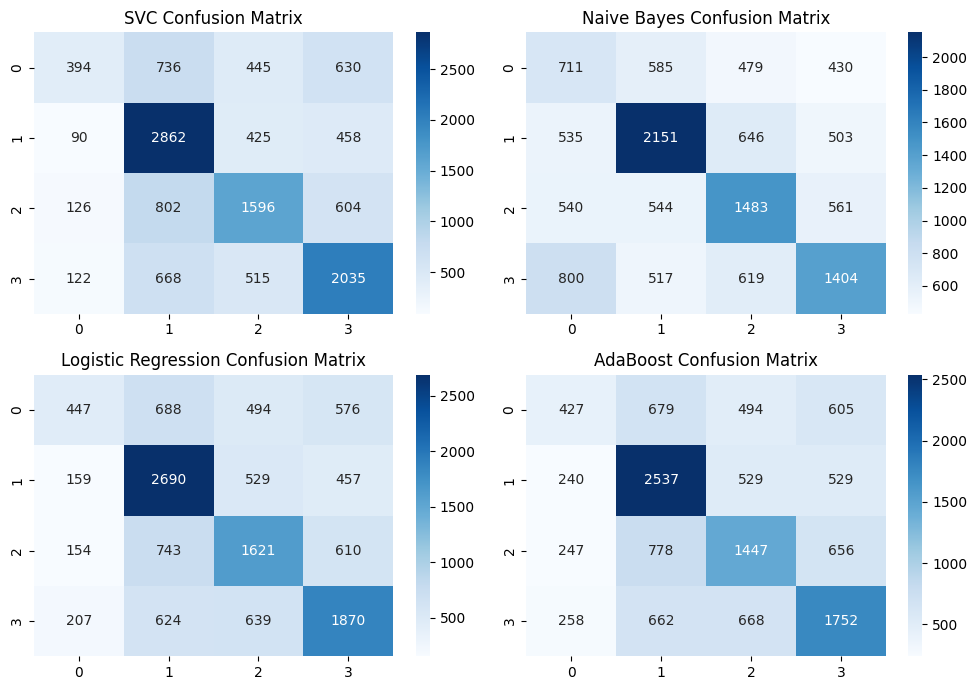

In [16]:
### Support Vector Classifier (SVC)
print("SVC Accuracy:", accuracy_score(y_test2, svc_predictions2))
print("SVC Classification Report:")
print(classification_report(y_test2, svc_predictions2))
svc_cm = confusion_matrix(y_test2, svc_predictions2)
print("*"*70)

### Naive Bayes
print("Naive Bayes Accuracy:", accuracy_score(y_test2, nb_predictions2))
print("Naive Bayes Classification Report:")
print(classification_report(y_test2, nb_predictions2))
nb_cm = confusion_matrix(y_test2, nb_predictions2)
print("*"*70)

### Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test2, lr_predictions2))
print("Logistic Regression Classification Report:")
print(classification_report(y_test2, lr_predictions2))
lr_cm = confusion_matrix(y_test2, lr_predictions2)
print("*"*70)

### AdaBoost Classifier
print("AdaBoost Accuracy:", accuracy_score(y_test2, ab_predictions))
print("AdaBoost Classification Report:")
print(classification_report(y_test2, ab_predictions))
ab_cm = confusion_matrix(y_test2, ab_predictions)
print("*"*70)

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
sns.heatmap(svc_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0, 0])
axes[0, 0].set_title("SVC Confusion Matrix")
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0, 1])
axes[0, 1].set_title("Naive Bayes Confusion Matrix")
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", ax=axes[1, 0])
axes[1, 0].set_title("Logistic Regression Confusion Matrix")
sns.heatmap(ab_cm, annot=True, fmt="d", cmap="Blues", ax=axes[1, 1])
axes[1, 1].set_title("AdaBoost Confusion Matrix")

plt.tight_layout()
plt.show()

#### => The best model is **SVM**.

### 5. Interpret the Obtained Results.

1. **Support Vector Classifier (SVC)** : Best overall, good with "Negative" and "Positive" classes, struggles with "Irrelevant."

2. **Naive Bayes** : Worst overall accuracy, poor with "Irrelevant" class, decent with "Negative."

3. **Logistic Regression** : Comparable to SVC, balanced but struggles with "Irrelevant."

4. **AdaBoost** : Lower accuracy, decent with "Negative" and "Positive."


### => Brief Synthesis about what I have learn during this lab.

In this lab, I delved into Natural Language Processing (NLP) tasks using the Scikit-learn library. I explored both regression and classification tasks, aiming to understand how to preprocess text data, encode it into numerical vectors, train various models, and evaluate their performance.

#### Key Learnings:

1.  **Preprocessing Pipeline:** Understanding the importance of tokenization, stemming/lemmatization, stop words removal, and discretization in preparing text data for modeling.
2.  **Encoding Data Vectors:** Utilizing techniques like Word2Vec (CBOW, Skip Gram), Bag of Words (BoW), and TF-IDF to convert text into numerical features.
3.  **Regression Models:** Learned to train and evaluate models like Support Vector Regression (SVR), Linear Regression, and Decision Tree for predicting continuous target variables.
4.  **Classification Models:** Explored classifiers such as Support Vector Classifier (SVC), Naive Bayes, Logistic Regression, and AdaBoost for classifying text into multiple categories.
5.  **Evaluation Metrics:** Gained insights into metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-Squared (R2) for regression, and Accuracy, F1 Score, Confusion Matrix for classification.
